# 🎯 Radiomics Pipeline: Feature Extraction + ML for PFS Prediction
This notebook performs radiomics-based feature extraction using PyRadiomics and applies a Random Forest classifier to predict a simulated PFS label.

In [1]:
# 🛠 Step 1: Install dependencies (if needed)
# !pip install pyradiomics scikit-learn matplotlib pandas SimpleITK -q

In [2]:
# 📥 Step 2: Download sample NRRD image + mask
import os, urllib.request
os.makedirs("data", exist_ok=True)
img_url = "https://github.com/AIM-Harvard/pyradiomics/raw/master/data/brain1_image.nrrd"
mask_url = "https://github.com/AIM-Harvard/pyradiomics/raw/master/data/brain1_label.nrrd"
urllib.request.urlretrieve(img_url, "data/image.nrrd")
urllib.request.urlretrieve(mask_url, "data/mask.nrrd")

('data/mask.nrrd', <http.client.HTTPMessage at 0x792f854bda00>)

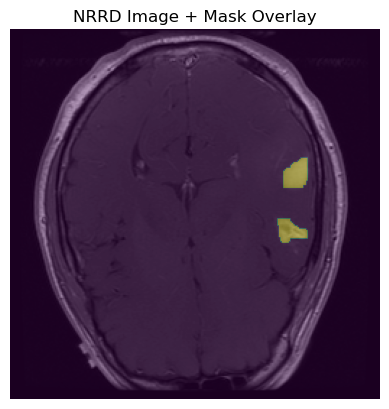

In [3]:
# 👁️ Step 3: Load and visualize
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
img = sitk.ReadImage("data/image.nrrd")
mask = sitk.ReadImage("data/mask.nrrd")
img_np = sitk.GetArrayFromImage(img)
mask_np = sitk.GetArrayFromImage(mask)
plt.imshow(img_np[img_np.shape[0] // 2], cmap='gray')
plt.imshow(mask_np[mask_np.shape[0] // 2], alpha=0.4)
plt.title("NRRD Image + Mask Overlay")
plt.axis('off')
plt.show()

In [10]:
# 🧬 Step 4: Extract radiomic features
from radiomics import featureextractor
import pandas as pd
extractor = featureextractor.RadiomicsFeatureExtractor()
result = extractor.execute("data/image.nrrd", "data/mask.nrrd")
features_df = pd.DataFrame([result]).drop(columns=[c for c in result if "diagnostics" in c])
features_df.to_csv("data/radiomics_features.csv", index=False)
features_df.T.head(60)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


,0
original_shape_Elongation,0.562117
original_shape_Flatness,0.46106
original_shape_LeastAxisLength,28.584423
original_shape_MajorAxisLength,61.99722
original_shape_Maximum2DDiameterColumn,49.490854979101925
original_shape_Maximum2DDiameterRow,65.88905951721043
original_shape_Maximum2DDiameterSlice,53.59397776919529
original_shape_Maximum3DDiameter,69.60099030590368
original_shape_MeshVolume,16147.51180013021
original_shape_MinorAxisLength,34.849702


In [5]:
# 🧠 Step 5: Train model to simulate PFS prediction (corrected)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Replicar dados para simulação
df = pd.concat([features_df] * 20, ignore_index=True)
df['label'] = [1] * 10 + [0] * 10

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("F1-score:", round(f1_score(y_test, y_pred), 3))

F1-score: 0.0


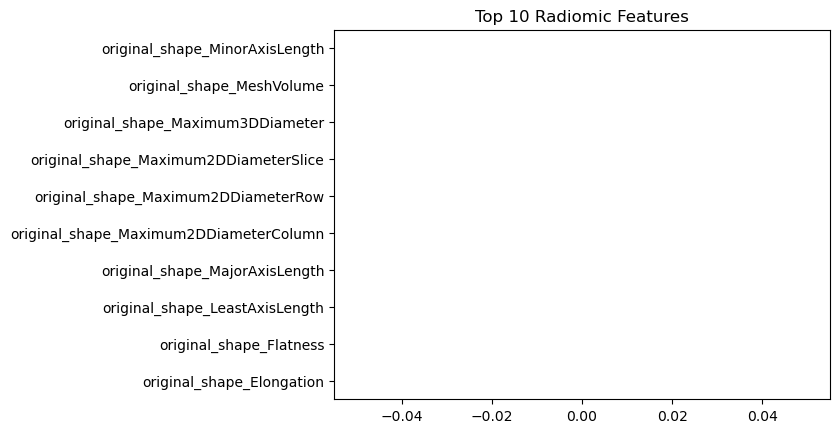

In [6]:
# 📊 Step 6: Visualize feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', title='Top 10 Radiomic Features')
plt.show()